
# Red Neuronal Artificial Para Clasificación De Imágenes

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
 
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

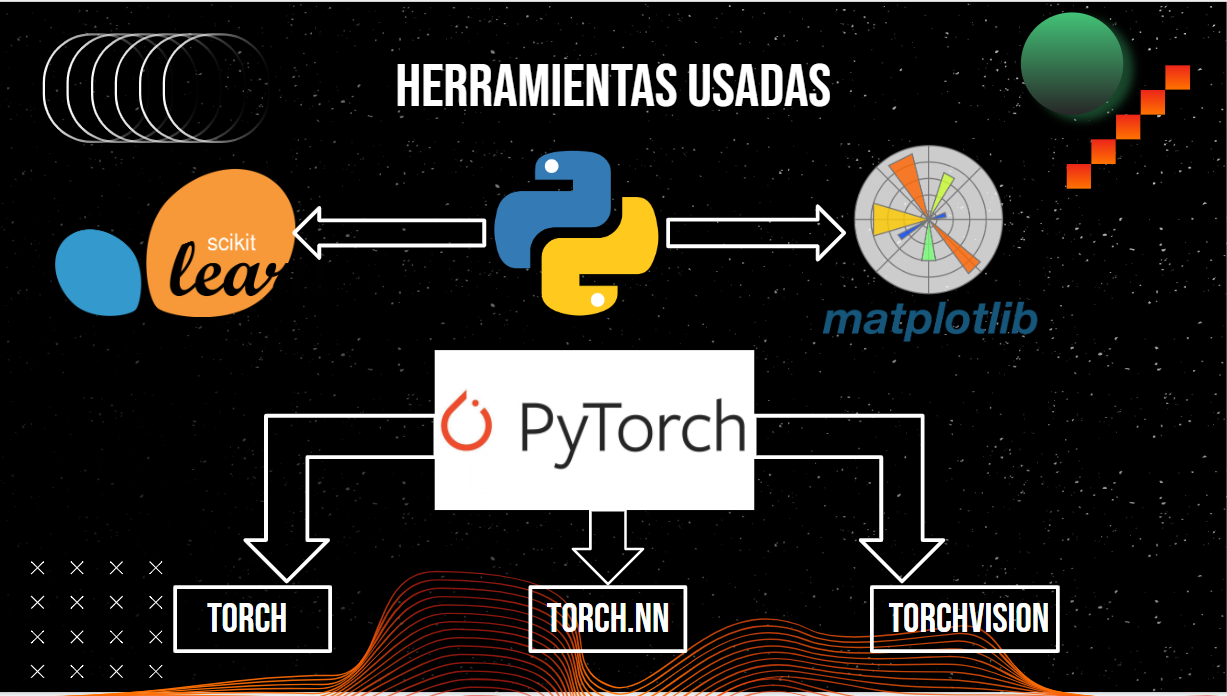

In [87]:
Image(filename='libraries.png')

## Exploración De Imágenes De Conjuntos De Datos CIFAR10

In [2]:
transform = transforms.ToTensor()

In [3]:
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


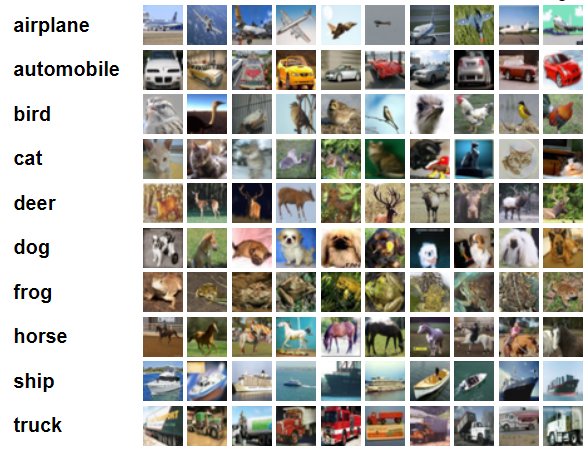

In [4]:
Image(filename='image.png')

In [5]:
print("Training Dataset Size: ", len(cifar10_train))
print("Testing Dataset Size: ", len(cifar10_test))

Training Dataset Size:  50000
Testing Dataset Size:  10000


In [6]:
type(cifar10_train)

torchvision.datasets.cifar.CIFAR10

In [7]:
type(cifar10_test)

torchvision.datasets.cifar.CIFAR10

In [8]:
cifar10_train[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [9]:
type(cifar10_train[0])

tuple

In [88]:
image, label = cifar10_train[5]
type(image)

torch.Tensor

In [89]:
image.shape

torch.Size([3, 32, 32])

In [90]:
classes = cifar10_train.classes
print ("Total Classes:  ",classes)
print("Element Label :  ",label)
print("Element class :", classes[label])

Total Classes:   ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Element Label :   1
Element class : automobile


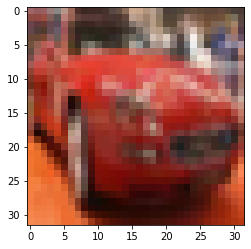

In [91]:
plt.imshow(image.permute(1, 2, 0))

In [14]:
torch.manual_seed(80)
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=500, shuffle=False)

## Construyendo El Modelo

In [15]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [16]:
torch.manual_seed(80)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
for param in model.parameters():
  print(param.numel())

368640
120
10080
84
840
10


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [73]:
for images, labels in train_loader:
  break

In [74]:
images.shape

torch.Size([100, 3, 32, 32])

In [21]:
images.view(-1, 3072).shape

torch.Size([100, 3072])

## Entrenando Al Modelo

In [22]:
import time
start_time = time.time()

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct  = []

#Train
for i in range(epochs):
   
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0
    

    for b_iter, (X_train, y_train) in enumerate(train_loader):
      b_iter +=1

      y_pred = model(X_train.view(100, -1)) #32*32*3 Aplanar imagen
      loss = criterion(y_pred, y_train) # Calcular la perdida
      
      predicted = torch.max(y_pred.data, 1)[1] # Extraer máximo valor de las predicciones
      # [0]->[>0]
      # [1]->[0]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr
     
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

        
#Print
      if b_iter % 100 == 0:
        
        accuracy = trn_corr.item()*100 / (100*b_iter)
        print( f'Epoch: {i} Batch {b_iter} Loss:{loss.item()} Accuracy:{accuracy} ')
    
    train_losses.append(loss)
    train_correct.append(trn_corr)

    
#Do the test    
    with torch.no_grad():
      
      for b_iter, (X_test, y_test) in enumerate(test_loader):
        
        y_val = model(X_test.view(500, -1))
        
        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()
     
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print( f' Duration: {total_time/60} mins')

Epoch: 0 Batch 100 Loss:2.2795045375823975 Accuracy:14.53 
Epoch: 0 Batch 200 Loss:2.2311697006225586 Accuracy:15.815 
Epoch: 0 Batch 300 Loss:2.166266441345215 Accuracy:17.386666666666667 
Epoch: 0 Batch 400 Loss:2.1228456497192383 Accuracy:19.4475 
Epoch: 0 Batch 500 Loss:2.1755008697509766 Accuracy:20.652 
Epoch: 1 Batch 100 Loss:1.9860860109329224 Accuracy:27.7 
Epoch: 1 Batch 200 Loss:2.0195648670196533 Accuracy:28.615 
Epoch: 1 Batch 300 Loss:1.9050509929656982 Accuracy:29.44 
Epoch: 1 Batch 400 Loss:2.0092906951904297 Accuracy:29.725 
Epoch: 1 Batch 500 Loss:2.0692601203918457 Accuracy:30.122 
Epoch: 2 Batch 100 Loss:1.8944330215454102 Accuracy:31.68 
Epoch: 2 Batch 200 Loss:1.8663487434387207 Accuracy:32.455 
Epoch: 2 Batch 300 Loss:1.8614460229873657 Accuracy:32.64 
Epoch: 2 Batch 400 Loss:1.779637336730957 Accuracy:32.675 
Epoch: 2 Batch 500 Loss:1.9161077737808228 Accuracy:32.93 
Epoch: 3 Batch 100 Loss:1.800730586051941 Accuracy:34.83 
Epoch: 3 Batch 200 Loss:2.004302263259

In [23]:
train_accuracy =[t/500 for t in train_correct ] 
train_accuracy

[tensor(20.6520),
 tensor(30.1220),
 tensor(32.9300),
 tensor(35.0900),
 tensor(36.5500),
 tensor(37.8080),
 tensor(39.2060),
 tensor(40.3600),
 tensor(41.0580),
 tensor(42.0800)]

In [24]:
test_accuracy =[t/100 for t in test_correct ] 
test_accuracy

[tensor(28.9400),
 tensor(32.2000),
 tensor(33.1500),
 tensor(36.0900),
 tensor(37.6100),
 tensor(38.8800),
 tensor(39.8200),
 tensor(40.8400),
 tensor(41.1900),
 tensor(42.8600)]

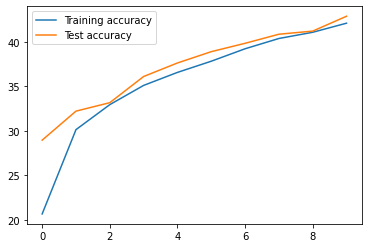

In [25]:
plt.plot(train_accuracy, label= "Training accuracy")
plt.plot(test_accuracy, label= "Test accuracy")
plt.legend()

In [26]:
test_load_all = DataLoader(cifar10_test, batch_size=10000, shuffle=False)

In [27]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all: 
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [28]:
100*correct.item()/len(cifar10_test)

42.86

In [29]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[458,  42, 104,  33,  66,  35,   5,  45,  95,  48],
       [ 32, 517,  27,  33,  29,  26,  22,  40,  69, 161],
       [ 49,   8, 243,  80, 148,  85,  58,  59,  11,   3],
       [ 43,  35,  88, 269,  52, 172,  76,  75,  30,  38],
       [ 11,  13,  93,  29, 245,  43,  54,  96,   5,   8],
       [ 11,  26,  66, 187,  42, 328,  54,  51,  30,  16],
       [ 48,  57, 256, 232, 287, 189, 689, 119,  27,  65],
       [ 37,  25,  52,  35,  69,  51,   9, 404,  12,  35],
       [243, 126,  56,  50,  39,  49,  16,  31, 648, 141],
       [ 68, 151,  15,  52,  23,  22,  17,  80,  73, 485]], dtype=int64)

In [30]:
img = images[2].view(1, 3072)
 
# we are turning off the gradients
with torch.no_grad():
    model_prediction = model.forward(img)

[0.00552675 0.0022569  0.01166819 0.17476587 0.00356231 0.7689671
 0.00813262 0.00774856 0.01585629 0.00151543]


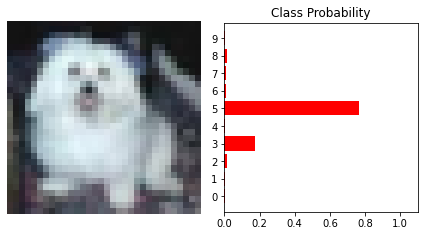

In [31]:
probabilities = F.softmax(model_prediction, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
img = img.view(3, 32, 32)
ax1.imshow(img.permute(1, 2, 0).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [32]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [33]:
test_load_all = DataLoader(cifar10_test, batch_size=64, shuffle=False)

In [34]:
images, labels = next(iter(test_load_all))
 
with torch.no_grad():
  images, labels = images, labels
  preds = model(X_test.view(len(X_test),-1))
 
images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = cifar10_test.classes

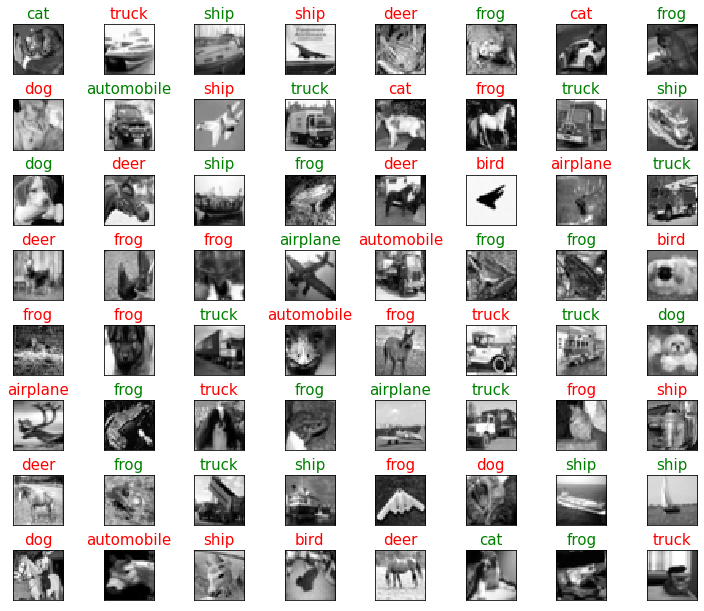

In [35]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)
 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "green" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)

## Exploración De Imágenes De Conjuntos De Datos MNIST

In [37]:
# Definir transformación para normalizar datos
transform =  transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307),(0.3081))])

# Descargar y cargar los datos de entrenamiento
train_set =  datasets.MNIST('DATA_MNIST/', download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

validation_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
validation_loader= torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

In [38]:
training_data=iter(trainLoader)
images, labels = training_data.next()
print(type(images)) # Comprobación del tipo de datos
print(images.shape) # El tamaño de la imagen
print(labels.shape) # El tamaño de las etiquetas

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


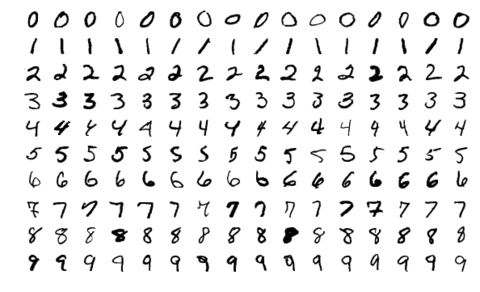

In [39]:
Image(filename='MNIST.png')

In [40]:
print("Training Dataset Size: ", len(train_set))
print("Testing Dataset Size: ", len(validation_set))

Training Dataset Size:  60000
Testing Dataset Size:  10000


In [41]:
type(train_set)

torchvision.datasets.mnist.MNIST

In [42]:
type(validation_set)

torchvision.datasets.mnist.MNIST

In [43]:
type(train_set[0])

tuple

In [44]:
image, label = train_set[0]
type(image)

torch.Tensor

In [45]:
image.shape

torch.Size([1, 28, 28])

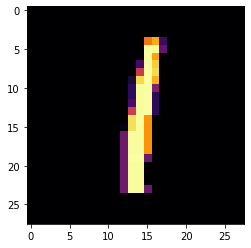

In [46]:
plt.imshow(images[4].numpy().squeeze(), cmap='inferno')

## Entrenando Al Modelo

In [47]:
class MultilayerPerceptron2(nn.Module):
  def __init__(self):
    super(MultilayerPerceptron2, self).__init__()
    self.fc1 = nn.Linear(784, 256) #28*28
    self.fc2 = nn.Linear(256, 128) 
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)  # Nro. de clases
    self.dropout = nn.Dropout(p=0.5)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = self.dropout(F.relu(self.fc4(x)))
    return x


In [48]:
model = MultilayerPerceptron2()
model.to("cpu")

MultilayerPerceptron2(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [49]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [50]:
epochs =  15
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [],[]

for epoch in range(epochs):
      total_train_loss = 0
      total_val_loss = 0
      model.train()
      total = 0
      #Entrenando nuestro modelo
      for idx, (image, label) in enumerate(trainLoader):
          image, label =  image.to('cpu'), label.to('cpu')

          optimizer.zero_grad()
          pred = model(image)

          loss =  criterion(pred, label)
          total_train_loss += loss.item()

          loss.backward()
          optimizer.step()

          pred  = torch.nn.functional.softmax(pred, dim=1)
          for i,p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total +=1

      accuracy_train = total / len(train_set)
      accuracy_total_train.append(accuracy_train)

      total_train_loss = total_train_loss / (idx + 1)
      train_loss.append(total_train_loss)

      # Validando nuestro modelo
      model.eval()
      total = 0
      for idx, (image, label) in enumerate(validation_loader):
          image, label = image.to('cpu'), label.to('cpu')
          pred = model(image)
          loss =  criterion(pred, label)
          total_val_loss += loss.item()

          pred =  torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
            if label[i] == torch.max(p.data,0)[1]:
              total += 1
      
      accuracy_val =  total / len(validation_set)
      accuracy_total_val.append(accuracy_val)

      total_val_loss = total_val_loss / (idx + 1)
      val_loss.append(total_val_loss)

      if epoch % 5 == 0:
        print("Epoch {}/{}  ".format(epoch,epochs),
              "Training Loss: {:.4f}  ".format(total_train_loss),
              "Testing Loss: {:.4f}  ".format(total_val_loss),
              "Train Accuracy: {:.4f}  ".format(accuracy_train),
              "Test Accuracy: {:.4f}  ".format(accuracy_val)
        )







Epoch 0/15   Training Loss: 2.2186   Testing Loss: 1.8586   Train Accuracy: 0.1878   Test Accuracy: 0.5286  
Epoch 5/15   Training Loss: 1.5221   Testing Loss: 0.7363   Train Accuracy: 0.4539   Test Accuracy: 0.8386  
Epoch 10/15   Training Loss: 1.4514   Testing Loss: 0.6012   Train Accuracy: 0.4669   Test Accuracy: 0.8572  


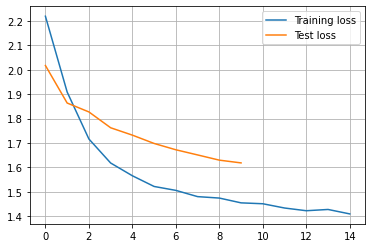

In [51]:
plt.plot(train_loss, label= "Training loss")
plt.plot(test_losses, label= "Test loss")
plt.legend()
plt.grid()

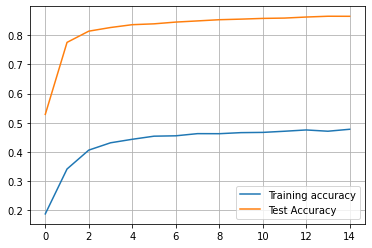

In [52]:
plt.plot(accuracy_total_train, label= "Training accuracy")
plt.plot(accuracy_total_val, label= "Test Accuracy")
plt.legend()
plt.grid()

In [63]:
img =  images[4].view(1, 784)
print(img.shape)

with torch.no_grad():
  logits = model.forward(img)

print(logits)

torch.Size([1, 784])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.0141, 0.0000, 0.0000, 0.0000,
         0.0000]])


[0.00552675 0.0022569  0.01166819 0.17476587 0.00356231 0.7689671
 0.00813262 0.00774856 0.01585629 0.00151543]


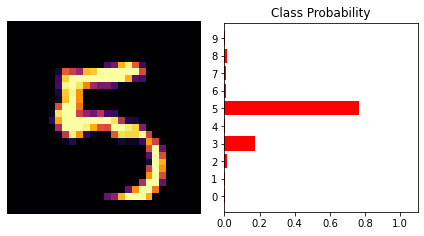

In [64]:
probabilities = F.softmax(model_prediction, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
ax1.imshow(img.view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [61]:
images, labels = next(iter(validation_loader))
 
with torch.no_grad():
  images, labels = images.to("cpu"), labels.to("cpu")
  preds = model(images)
 
images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

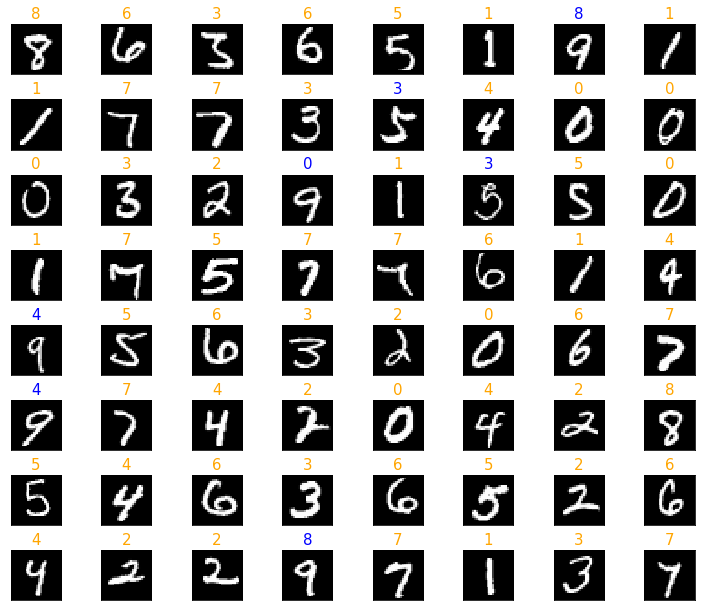

In [62]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)
 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "orange" if labels[i] == torch.max(preds[i], 0)[1] else "blue"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)